In [1]:
from models7 import BasicModel, InverseModel, RSIModel
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas_datareader as pdr


In [2]:
#chargement dataset nasdaq
start_date = '1998-01-01'
end_date = datetime.now()
df = pdr.DataReader('^NDX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df = df.rename_axis('Date').reset_index()

#delete Adj Close (pareil que Close)
df = df.drop('Adj Close', 1)

In [3]:
len(df)

5906

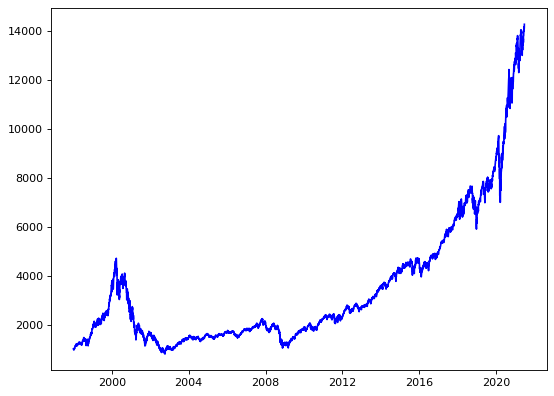

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df.Date, df.Close, color="b")

<h1>Partie 1 : Moyenne mobile prix 100 périodes (MM100)</h1>

In [ ]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "MM100_indicator", "MM100_acivity", "MM100_pf", "MM100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [ ]:
#indicateur MM100
df[indicator] = df.Close.rolling(window=100).mean()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [ ]:
model_mm100 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

In [ ]:
df[185:200]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="MM 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="MM 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model_mm100.stats(portefeuille, portefeuille_frais)

<h1>Partie 2 : Moyenne mobile prix 20 périodes (MM20)</h1>

In [ ]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "MM20_indicator", "MM20_acivity", "MM20_pf", "MM20_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [ ]:
#indicateur MM20
df[indicator] = df.Close.rolling(window=20).mean()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [ ]:
model_mm20 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

In [ ]:
df[185:200]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="MM 20p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="MM 20p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model_mm20.stats(portefeuille, portefeuille_frais)

<h1>Partie 3 : Moyenne mobile VIX 100 périodes (VIX100)</h1>

In [ ]:
#chargement dataset VIX
start_date = '1998-01-01'
end_date = datetime.now()
df_vix = pdr.DataReader('^VIX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df_vix = df_vix.rename_axis('Date').reset_index()

len(df), len(df_vix)

In [ ]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "VIX100_indicator", "VIX100_acivity", "VIX100_pf", "VIX100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [ ]:
#indicateur VIX100
df[indicator] = df_vix.Close.rolling(window=100).mean()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [ ]:
model_vix100 = InverseModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="VIX 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="VIX 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model_vix100.stats(portefeuille, portefeuille_frais)

<h1>Partie 4 : Relative Strenght Index prix 100 périodes (RSI100)</h1>

In [ ]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "RSI100_indicator", "RSI100_activity", "RSI100_pf", "RSI100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [ ]:
#indicateur RSI100

delta = df.Close.diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.clip(lower=0), delta.clip(upper=0)

# Calculate the SMA
roll_up2 = up.rolling(window=20).mean()
roll_down2 = down.abs().rolling(window=20).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

df[indicator] = RSI2

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [ ]:
# “buy signal” if a security's RSI reading moves below 30, based on the idea that the security has been oversold and is therefore poised for a rebound
model_rsi100 = RSIModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5, rsi_buy_inf = 50, rsi_sell_sup = 50)

In [ ]:
df[90:140]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="RSI 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="RSI 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model_rsi100.stats(portefeuille, portefeuille_frais)

In [ ]:
df[indicator]

cross_val avec une boucle for manuelle / trouver le min max qui est bon 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut, ShuffleSplit, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm

In [ ]:
X = df.drop(['Close'], axis=1)
y = df.Close

In [ ]:
X.shape, y.shape

In [ ]:
#Set a seed to ensure reproducibility
seed = 42

#Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=seed)

#Number of rounds
rounds = 20

In [ ]:
#Define the hyperparameter grid
rf_param_grid = {'max_depth': [10, 50],
                'n_estimators': [100, 200, 400]}

#Create arrays to store the scores
outer_scores = np.zeros(rounds)
nested_scores = np.zeros(rounds)

In [ ]:
# Loop for each round
for i in range(rounds):

   #Define both cross-validation objects (inner & outer)
   inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
   outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

   # Non-nested parameter search and scoring
   clf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=inner_cv)
   clf.fit(X, y)
   outer_scores[i] = clf.best_score_

   # Nested CV with parameter optimization
   nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
   nested_scores[i] = nested_score.mean()

In [ ]:
cv = ShuffleSplit(4, test_size=0.2)
cross_val_score(RSIModel, X, y, cv=cv)

<h1>Partie 5 : Bollinger Band prix 100 périodes (MM100)</h1>

In [12]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "BB100_indicator", "BB100_activity", "BB100_pf", "BB100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [13]:
#indicateur BB100

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
df['100 Day MA'] = df.Close.rolling(window=100).mean()
    
# set .std(ddof=0) for population std instead of sample
df['100 Day STD'] = df.Close.rolling(window=100).std()

df['Upper Band'] = df['100 Day MA'] + (df['100 Day STD'] * 2)
df['Lower Band'] = df['100 Day MA'] - (df['100 Day STD'] * 2)

df[indicator] = df[['100 Day MA', 'Upper Band', 'Lower Band']]
df[indicator]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
5901    13449.745527
5902    13456.550723
5903    13462.144619
5904    13472.390420
5905    13483.079316
Name: BB100_indicator, Length: 5906, dtype: float64

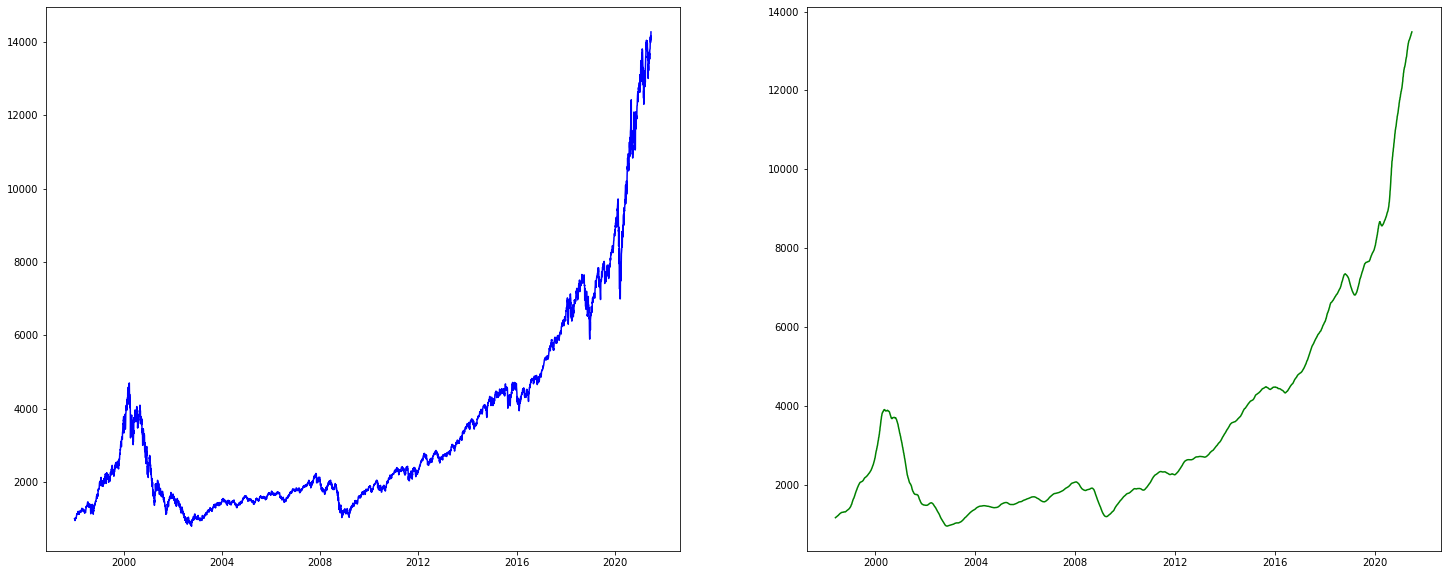

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [15]:
# “buy signal” if a security's RSI reading moves below 30, based on the idea that the security has been oversold and is therefore poised for a rebound
model_bb100 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-08-31 00:00:00 || GO SELL || 166 || 1140.3399658203125 || 1140.3399658203125 || 1137.8399658203125
1998-09-01 00:00:00 || GO BUY || 167 || 1215.06005859375|| 1215.06005859375 || 1209.896247592178

1998-09-03 00:00:00 || GO SELL || 169 || 1208.9599609375 || 1208.9599609375 || 1201.3220743757654
1998-09-08 00:00:00 || GO BUY || 171 || 1286.469970703125|| 1290.2586185844489 || 1279.6071087888668

1998-09-10 00:00:00 || GO SELL || 173 || 1235.3699951171875 || 1239.0081538159823 || 1226.2797334845172
1998-09-11 00:00:00 || GO BUY || 174 || 1290.199951171875|| 1293.9995838277541 || 1278.2062325604738

1998-10-05 00:00:00 || GO SELL || 190 || 1207.6800537109375 || 1211.2366656653608 || 1193.9534413368983
1998-10-12 00:00:00 || GO BUY || 195 || 1243.4000244140625|| 1257.2747508482173 || 1236.8346057243205

1998-10-13 00:00:00 || GO SELL || 196 || 1206.9000244140625 || 1220.3674583398508 || 1198.027333549212
1998-10-14 00:00:00 || GO BUY || 197 || 1235.6700439453125|| 1249.458513855228 || 

2004-10-21 00:00:00 || GO BUY || 1710 || 1474.7900390625|| 4086.93914713405 || 3783.8211993630425

2004-10-22 00:00:00 || GO SELL || 1711 || 1438.25 || 3985.679366333476 || 3687.571600594304
2004-10-27 00:00:00 || GO BUY || 1714 || 1480.030029296875|| 4090.39697214179 || 3781.9568825672486

2004-10-28 00:00:00 || GO SELL || 1715 || 1487.1199951171875 || 4109.991692620382 || 3797.5740453953813
2004-11-01 00:00:00 || GO BUY || 1717 || 1488.7900390625|| 4115.71433301524 || 3800.3616839747156

2005-03-22 00:00:00 || GO SELL || 1814 || 1465.0899658203125 || 4050.196208513412 || 3737.363663505878
2005-06-01 00:00:00 || GO BUY || 1863 || 1559.5|| 4094.4886117760225 || 3775.7349719563367

2005-06-03 00:00:00 || GO SELL || 1865 || 1544.47998046875 || 4055.053344754954 || 3736.8697183342733
2005-06-14 00:00:00 || GO BUY || 1872 || 1524.4200439453125|| 4042.563142618911 || 3722.8595718158745

2005-06-23 00:00:00 || GO SELL || 1879 || 1515.949951171875 || 4020.101561248042 || 3699.674350520732
200

2016-05-27 00:00:00 || GO BUY || 4630 || 4512.5400390625|| 13860.325815482875 || 12335.133444189429

2018-10-24 00:00:00 || GO SELL || 5237 || 6789.14990234375 || 20852.96281962471 || 18555.79960356745
2019-03-08 00:00:00 || GO BUY || 5328 || 7015.68994140625|| 20819.755558935787 || 18523.750456040692

2019-03-13 00:00:00 || GO SELL || 5331 || 7256.97998046875 || 21535.807675554894 || 19158.336260637432
2019-03-15 00:00:00 || GO BUY || 5333 || 7306.990234375|| 21726.042276166805 || 19325.069683494752

2019-08-23 00:00:00 || GO SELL || 5445 || 7464.990234375 || 22195.827313443235 || 19740.438178190143
2019-08-26 00:00:00 || GO BUY || 5446 || 7575.02001953125|| 22522.981406615047 || 20028.901207402778

2019-09-03 00:00:00 || GO SELL || 5451 || 7609.509765625 || 22625.530562654963 || 20117.59459242342
2019-09-04 00:00:00 || GO BUY || 5452 || 7719.25|| 22951.82372782321 || 20405.219661400508

2019-09-24 00:00:00 || GO SELL || 5466 || 7710.0400390625 || 22924.43953894766 || 20378.3738666662

In [16]:
df[90:140]

,Date,High,Low,Open,Close,Volume,BB100_indicator,BB100_activity,BB100_pf,BB100_pf_frais,100 Day MA,100 Day STD,Upper Band,Lower Band
90,1998-05-13,1270.369995,1256.410034,1256.410034,1263.079956,783840000,NaN,1,1263.079956,1263.079956,NaN,NaN,NaN,NaN
91,1998-05-14,1280.280029,1249.810059,1263.079956,1266.150024,741310000,NaN,1,1266.150024,1266.150024,NaN,NaN,NaN,NaN
92,1998-05-15,1270.510010,1245.959961,1266.099976,1249.489990,755970000,NaN,1,1249.489990,1249.489990,NaN,NaN,NaN,NaN
93,1998-05-18,1255.390015,1232.300049,1249.489990,1242.500000,685930000,NaN,1,1242.500000,1242.500000,NaN,NaN,NaN,NaN
94,1998-05-19,1259.219971,1242.500000,1242.500000,1255.589966,678040000,NaN,1,1255.589966,1255.589966,NaN,NaN,NaN,NaN
95,1998-05-20,1259.569946,1233.790039,1255.589966,1237.750000,674390000,NaN,1,1237.750000,1237.750000,NaN,NaN,NaN,NaN
96,1998-05-21,1242.349976,1221.449951,1237.750000,1223.699951,681880000,NaN,1,1223.699951,1223.699951,NaN,NaN,NaN,NaN
97,1998-05-22,1243.630005,1210.510010,1223.699951,1214.130005,637350000,NaN,1,1214.130005,1214.130005,NaN,NaN,NaN,NaN
98,1998-05-26,1226.790039,1198.290039,1214.130005,1200.119995,676260000,NaN,1,1200.119995,1200.119995,NaN,NaN,NaN,NaN
99,1998-05-27,1209.930054,1180.229980,1200.119995,1209.459961,793890000,1161.779502,1,1209.459961,1209.459961,1161.779502,85.313706,1332.406914,991.152090


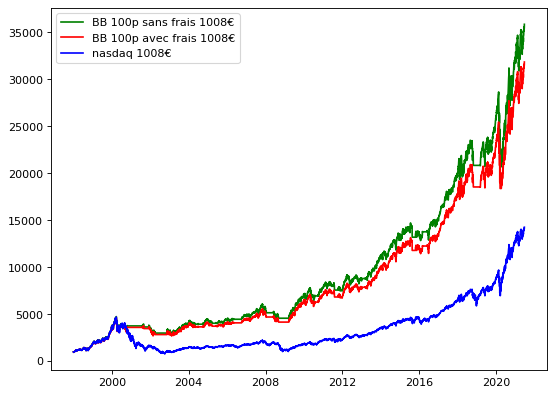

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="BB 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="BB 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [18]:
model_bb100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 35868€
Stratégie avec frais final: 31856€
Sans stratégie final: 14270€

Total frais: 500€
Total transactions: 200
